#### Resumen previo:
Estudio convergencia de lo trabajado en "1DP1_3"
## Parte cuatro: Convergencia del problema resuelto en Parte tres 

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using Test
using GridapODEs
if  Atom == false
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh
using Gridap.CellData
using Gridap.Visualization
using Gridap.Arrays
using LinearAlgebra

In [3]:
L=200.
model1 = GmshDiscreteModel("modelos/1D_200_origen_1.msh")
model2 = GmshDiscreteModel("modelos/1D_200_origen_2.msh")
model3 = GmshDiscreteModel("modelos/1D_200_origen_3.msh")
model4 = GmshDiscreteModel("modelos/1D_200_origen_4.msh")

Info    : Reading 'modelos/1D_200_origen_1.msh'...
Info    : 3 entities
Info    : 513 nodes
Info    : 514 elements
Info    : Done reading 'modelos/1D_200_origen_1.msh'
Info    : Reading 'modelos/1D_200_origen_2.msh'...
Info    : 3 entities
Info    : 1025 nodes
Info    : 1026 elements
Info    : Done reading 'modelos/1D_200_origen_2.msh'
Info    : Reading 'modelos/1D_200_origen_3.msh'...
Info    : 3 entities
Info    : 2049 nodes
Info    : 2050 elements
Info    : Done reading 'modelos/1D_200_origen_3.msh'
Info    : Reading 'modelos/1D_200_origen_4.msh'...
Info    : 3 entities
Info    : 4097 nodes
Info    : 4098 elements
Info    : Done reading 'modelos/1D_200_origen_4.msh'


UnstructuredDiscreteModel()

In [4]:
Ω1 = Triangulation(model1)
degree = 3
dΩ1 = Measure(Ω1,degree)

Ω2 = Triangulation(model2)
dΩ2 = Measure(Ω2,degree)

Ω3 = Triangulation(model3)
dΩ3 = Measure(Ω3,degree)

Ω4 = Triangulation(model4)
dΩ4 = Measure(Ω4,degree)

Measure()

In [5]:
neumanntags_L= ["center"]
Γ_L1 = BoundaryTriangulation(model1,tags=neumanntags_L)
dΓ_L1 = Measure(Γ_L1,degree)

Γ_L2 = BoundaryTriangulation(model2,tags=neumanntags_L)
dΓ_L2 = Measure(Γ_L2,degree)

Γ_L3= BoundaryTriangulation(model3,tags=neumanntags_L)
dΓ_L3 = Measure(Γ_L3,degree)

Γ_L4 = BoundaryTriangulation(model4,tags=neumanntags_L)
dΓ_L4 = Measure(Γ_L4,degree)

Measure()

In [6]:
neumanntags_R= ["ext"]
Γ_R1 = BoundaryTriangulation(model1,tags=neumanntags_R)
dΓ_R1 = Measure(Γ_R1,degree)

Γ_R2 = BoundaryTriangulation(model2,tags=neumanntags_R)
dΓ_R2 = Measure(Γ_R2,degree)

Γ_R3= BoundaryTriangulation(model3,tags=neumanntags_R)
dΓ_R3 = Measure(Γ_R3,degree)

Γ_R4 = BoundaryTriangulation(model4,tags=neumanntags_R)
dΓ_R4 = Measure(Γ_R4,degree)

Measure()

In [80]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)

(Lagrangian(), (Float64, 3), Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())

In [81]:
V1 = TestFESpace(model1,reffe,conformity=:H1)
U1 = TrialFESpace(V1)

V2 = TestFESpace(model2,reffe,conformity=:H1)
U2 = TrialFESpace(V2)

V3 = TestFESpace(model3,reffe,conformity=:H1)
U3 = TrialFESpace(V3)

V4 = TestFESpace(model4,reffe,conformity=:H1)
U4 = TrialFESpace(V4)


UnconstrainedFESpace()

In [9]:
R=5
s(x) = (x[1]/ R ) 

#Cond de Newman borde centro
c(x)=0.

alfa(x)=1. /((s(x))^4  +1)
t(x) = alfa(x)

t (generic function with 1 method)

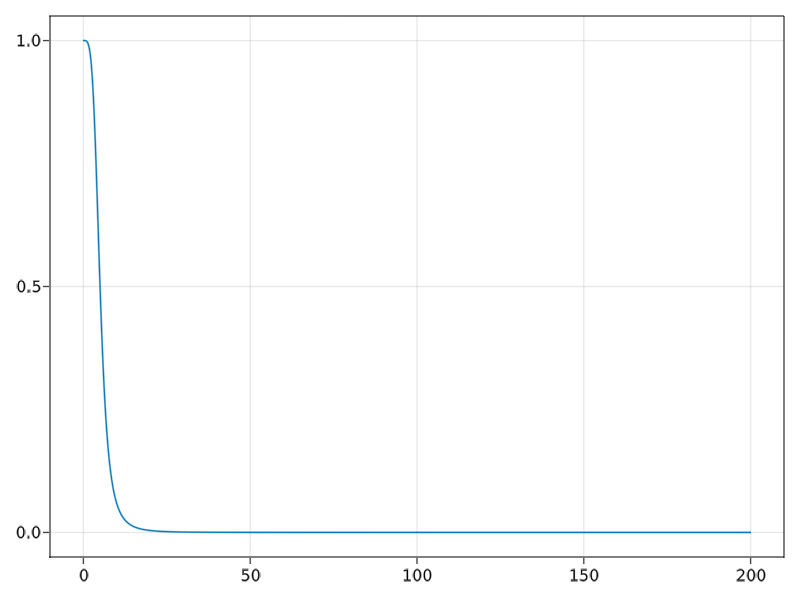

In [10]:
x = range(0., L, length=1000)
lines(x, alfa, label= "u")

In [11]:
ρ(x)=x[1]
d(x) = VectorValue(2. )
invrho3(x)=3. / x[1]
ρvec(x) = VectorValue(1.)

ρvec (generic function with 1 method)

In [12]:
a1(u,v) = ∫( - ∇(v) ⋅ ∇(u)*ρ +(d ⋅ ∇(u))*v) *dΩ1 -∫( v *( u  ) )*dΓ_R1 
b1(v) = ∫(-v * t* ρ) *dΩ1 - ∫( v *c*ρ ) *dΓ_L1 

a2(u,v) = ∫( - ∇(v) ⋅ ∇(u)*ρ +(d ⋅ ∇(u))*v) *dΩ2 -∫( v *( u  ) )*dΓ_R2
b2(v) = ∫(-v * t* ρ) *dΩ2 - ∫( v *c*ρ ) *dΓ_L2

a3(u,v) = ∫( - ∇(v) ⋅ ∇(u)*ρ +(d ⋅ ∇(u))*v) *dΩ3 -∫( v *( u  ) )*dΓ_R3 
b3(v) = ∫(-v * t* ρ) *dΩ3 - ∫( v *c*ρ ) *dΓ_L3 

a4(u,v) = ∫( - ∇(v) ⋅ ∇(u)*ρ +(d ⋅ ∇(u))*v) *dΩ4 -∫( v *( u  ) )*dΓ_R4 
b4(v) = ∫(-v * t* ρ) *dΩ4 - ∫( v *c*ρ ) *dΓ_L4

b4 (generic function with 1 method)

In [13]:
op1 = AffineFEOperator(a1,b1,U1,V1)

op2 = AffineFEOperator(a2,b2,U2,V2)

op3 = AffineFEOperator(a3,b3,U3,V3)

op4 = AffineFEOperator(a4,b4,U4,V4)

AffineFEOperator()

In [14]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [15]:
uh1 = solve(solver,op1)
uh2 = solve(solver,op2)
uh3 = solve(solver,op3)
uh4 = solve(solver,op4)

SingleFieldFEFunction():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

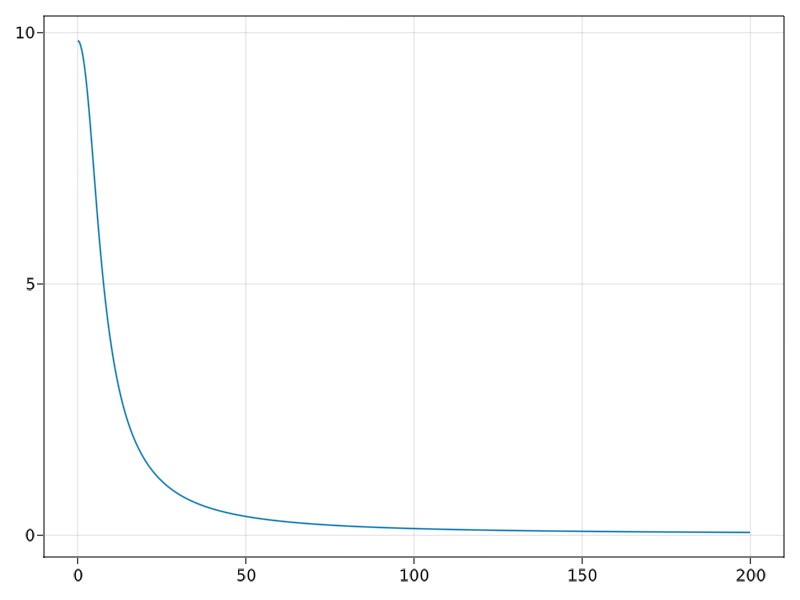

In [16]:
x = range(0., L, length=1000)
lines(x, evaluate(uh1, Gridap.Point.(x)), label= "u")

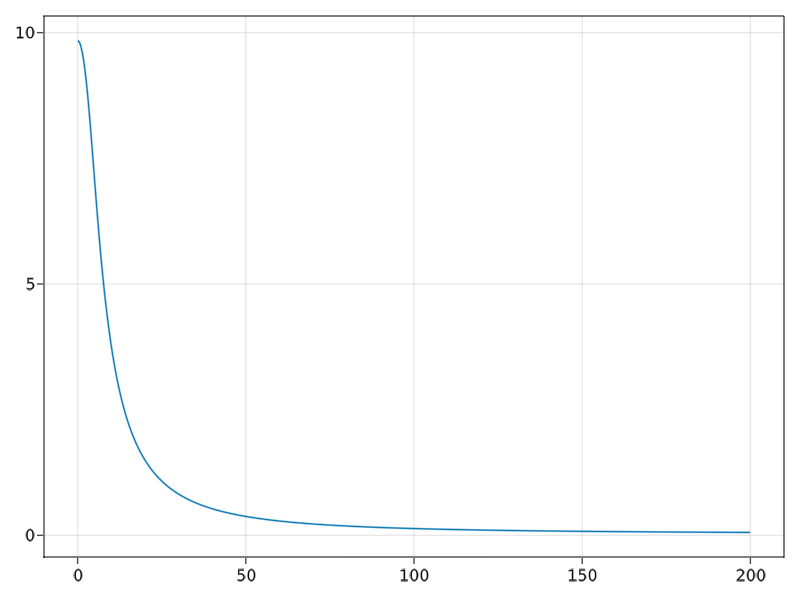

In [17]:
x = range(0., L, length=1000)
lines(x, evaluate(uh2, Gridap.Point.(x)), label= "u")

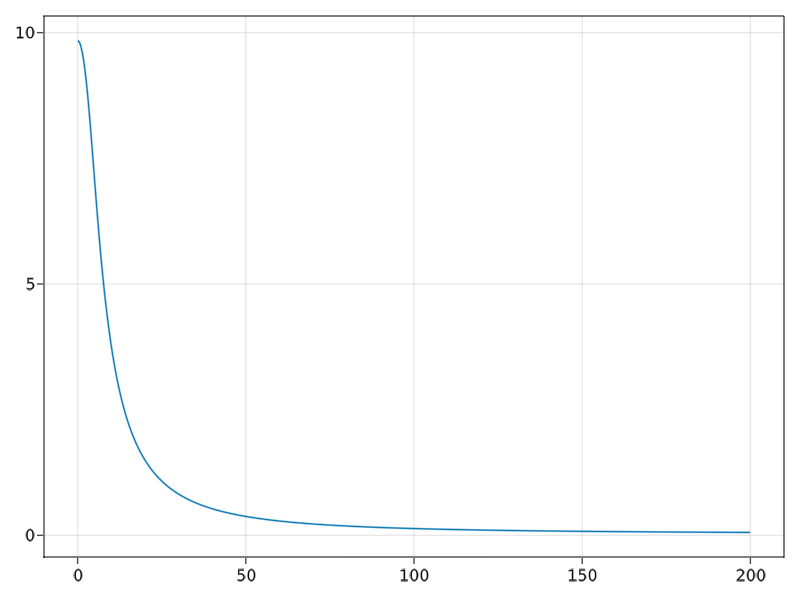

In [18]:
x = range(0., L, length=1000)
lines(x, evaluate(uh3, Gridap.Point.(x)), label= "u")

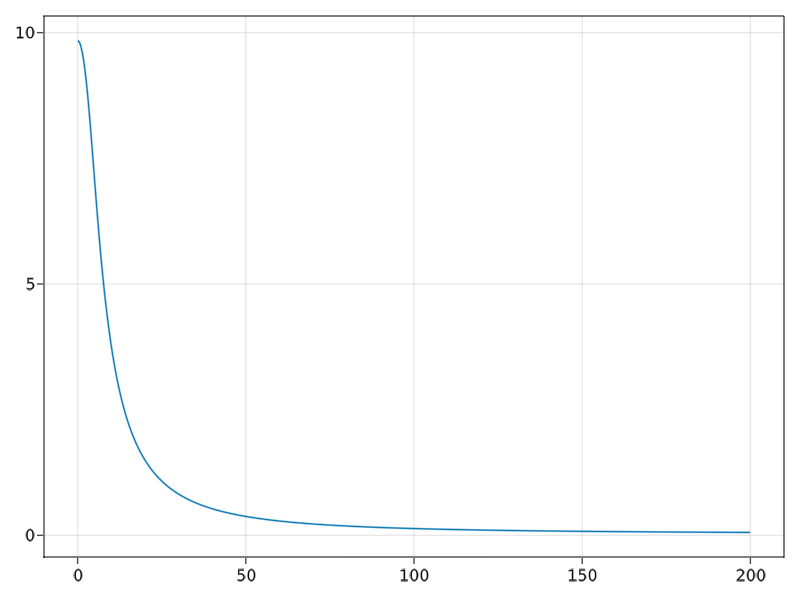

In [19]:
x = range(0., L, length=1000)
lines(x, evaluate(uh4, Gridap.Point.(x)), label= "u")

### Comparación soluciones para la $f$

In [20]:
u_12 = Interpolable(uh1)
u12 = interpolate_everywhere(u_12,U2)

SingleFieldFEFunction():
 num_cells: 1024
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18027149190844755320

In [21]:
dif_cuad_f12= (uh2-u12)*(uh2-u12)
L2norm_dif_cuad_f12= sqrt(sum( ∫( dif_cuad_f12)*dΩ2 ))

1.551138956363598e-6

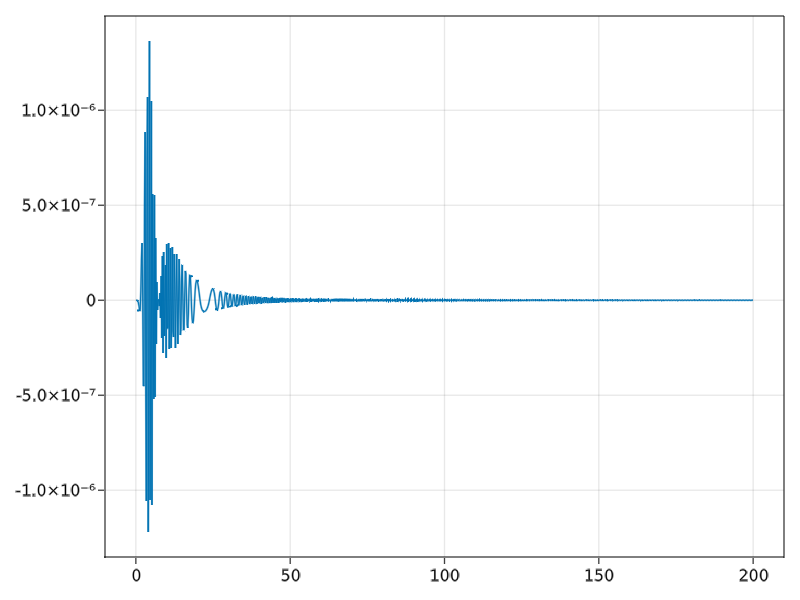

In [22]:
x = range(0., L, length=1000)
lines(x, evaluate(uh2-u12,Gridap.Point.(x)), label= "u")

In [23]:
u_23 = Interpolable(uh2)
u23 = interpolate_everywhere(u_23,U3)

SingleFieldFEFunction():
 num_cells: 2048
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2380659641351410269

In [24]:
dif_cuad_f23= (uh3-u23)*(uh3-u23)
L2norm_dif_cuad_f23= sqrt(sum( ∫( dif_cuad_f23)*dΩ3 ))

1.9389560474344052e-7

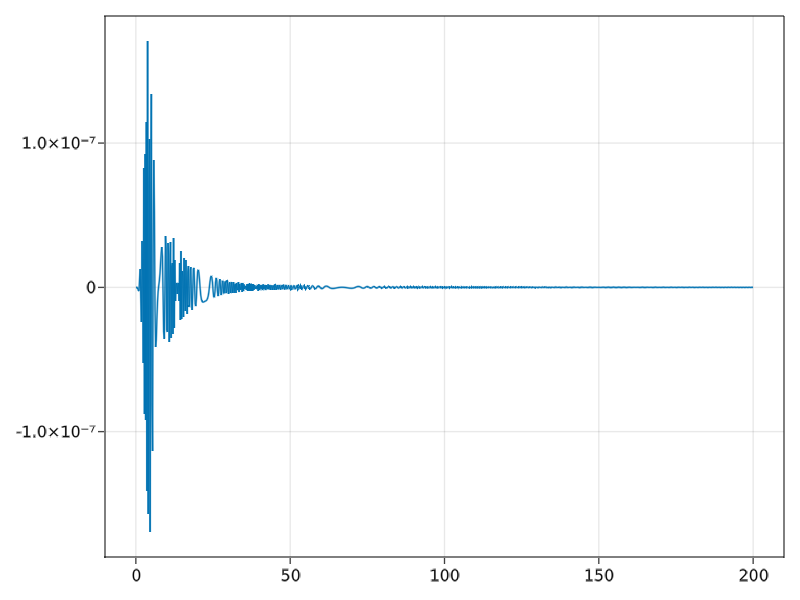

In [25]:
x = range(0., L, length=1000)
lines(x, evaluate(uh3-u23,Gridap.Point.(x)), label= "u")

In [26]:
u_34 = Interpolable(uh3)
u34 = interpolate_everywhere(u_34,U4)

SingleFieldFEFunction():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

In [27]:
dif_cuad_f34= (uh4-u34)*(uh4-u34)
L2norm_dif_cuad_f34= sqrt(sum( ∫( dif_cuad_f34)*dΩ4 ))

2.424691998759446e-8

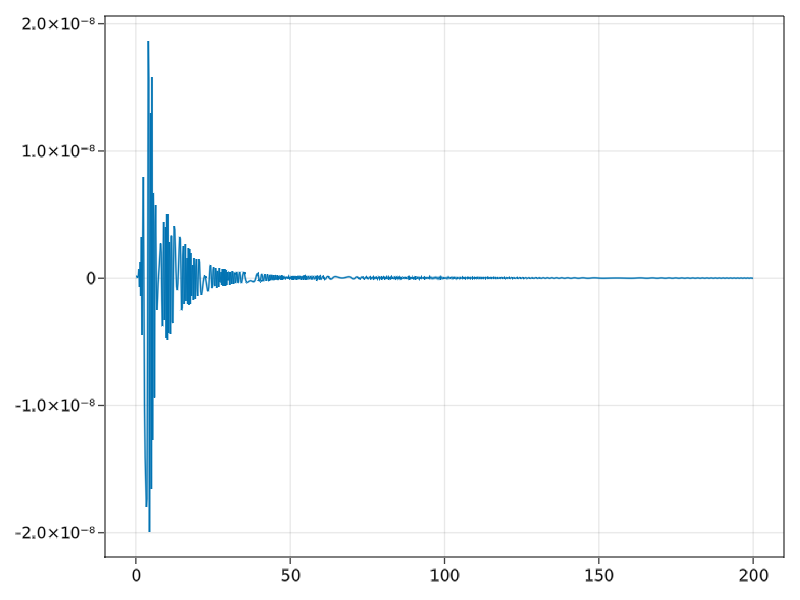

In [28]:
x = range(0., L, length=1000)
lines(x, evaluate(uh4-u34,Gridap.Point.(x)), label= "u")

### Estudio de residuales de  la $f$

In [29]:
f11=∇(uh1) ⋅ ρvec
f12=∇(uh2) ⋅ ρvec
f13=∇(uh3) ⋅ ρvec
f14=∇(uh4) ⋅ ρvec

OperationCellField():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

In [30]:
eq_cuad_f1=(Δ(uh1)+invrho3*f11+t)*(Δ(uh1)+invrho3*f11+t)
L2norm_eq_quad_f1= sqrt(sum( ∫(eq_cuad_f1)*dΩ1 ))

0.005848518914813376

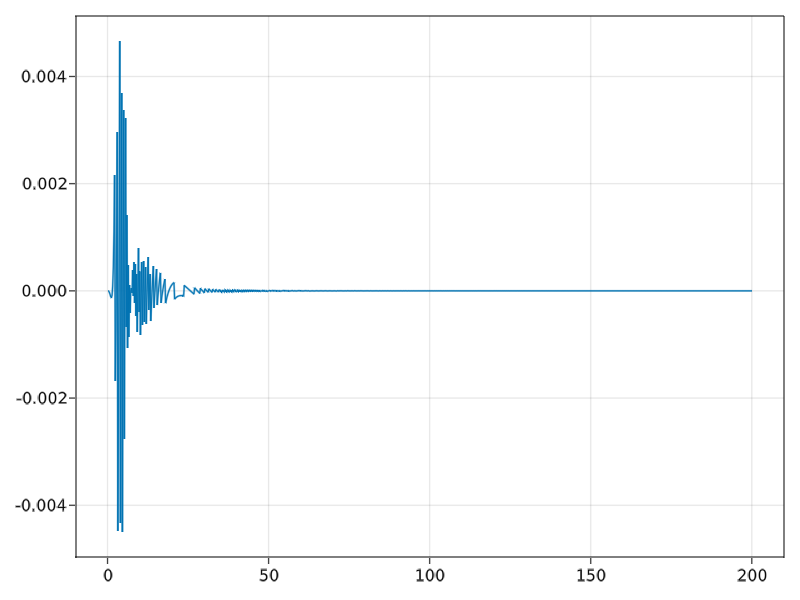

In [31]:
x = range(0., L, length=1000) #residual
lines(x, evaluate(Δ(uh1)+invrho3*f11+t, Gridap.Point.(x)), label= "u")

In [32]:
eq_cuad_f2=( Δ(uh2)+invrho3*f12+t)*( Δ(uh2)+invrho3*f12+t)
L2norm_eq_quad_f2= sqrt(sum( ∫(eq_cuad_f2)*dΩ2 ))

0.0029248505044691406

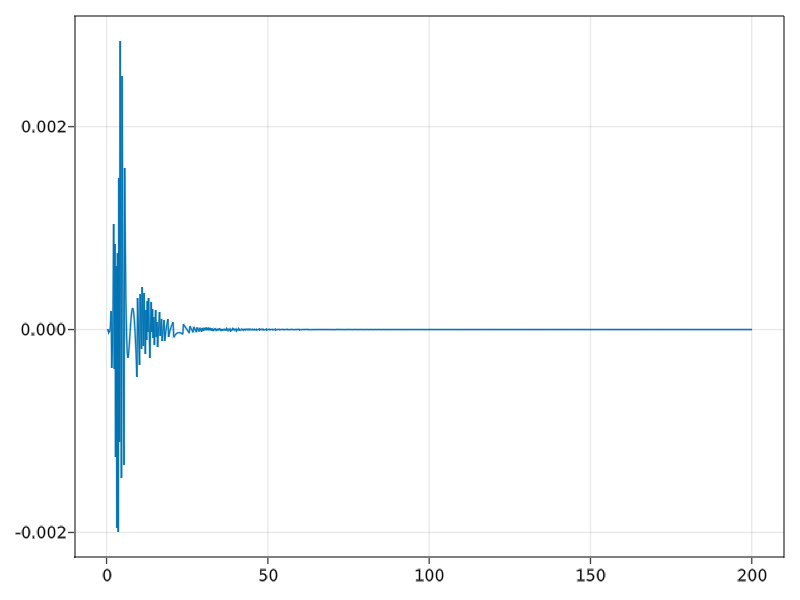

In [33]:
x = range(0., L, length=1000) #residual
lines(x, evaluate( Δ(uh2)+invrho3*f12+t, Gridap.Point.(x)), label= "u")

In [34]:
eq_cuad_f3=( Δ(uh3)+invrho3*f13+t)*( Δ(uh3)+invrho3*f13+t)
L2norm_eq_quad_f3= sqrt(sum( ∫(eq_cuad_f3)*dΩ3 ))

0.0014624991375557282

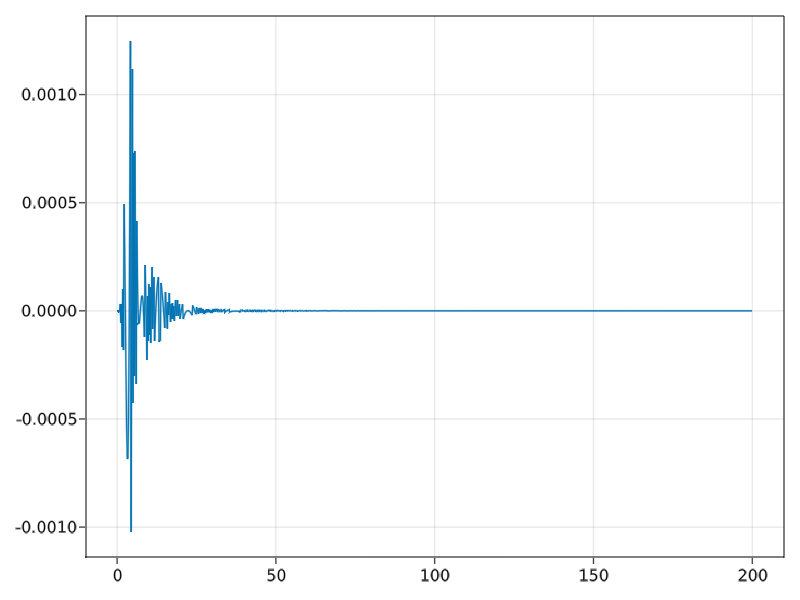

In [35]:
x = range(0., L, length=1000) #residual
lines(x, evaluate( Δ(uh3)+invrho3*f13+t, Gridap.Point.(x)), label= "u")

In [36]:
eq_cuad_f4=(Δ(uh4)+invrho3*f14+t)*( Δ(uh4)+invrho3*f14+t)
L2norm_eq_quad_f4= sqrt(sum( ∫(eq_cuad_f4)*dΩ4 ))

0.0007312588046090688

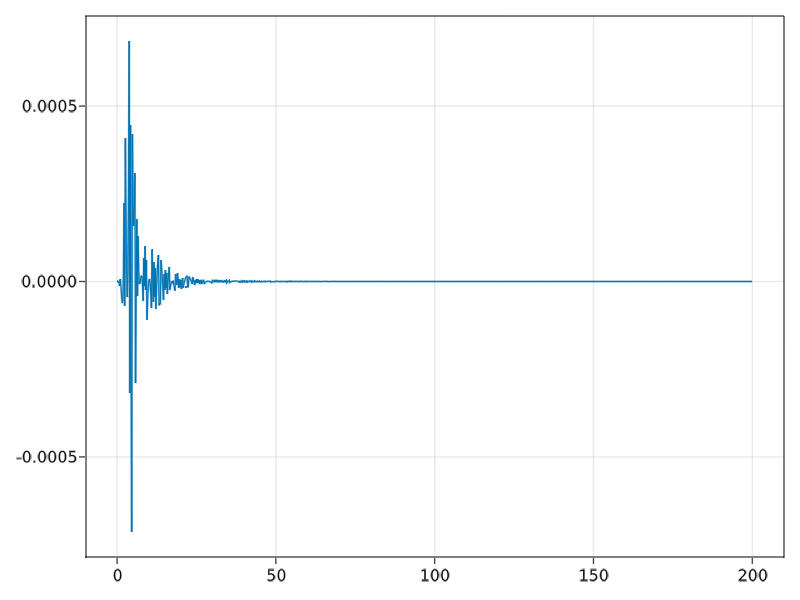

In [37]:
x = range(0., L, length=1000) #residual
lines(x, evaluate(Δ(uh4)+invrho3*f14+t, Gridap.Point.(x)), label= "u")

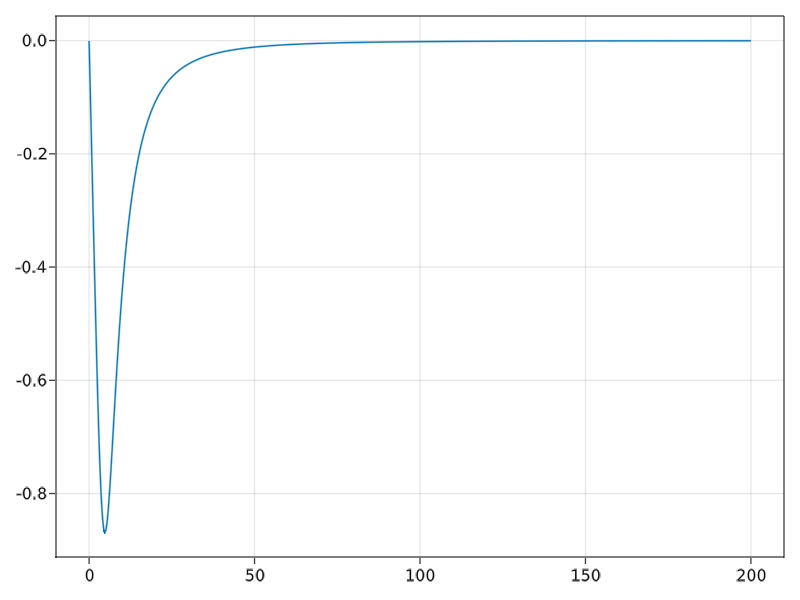

In [38]:
x = range(0., L, length=1000) #residual
lines(x, evaluate(f14, Gridap.Point.(x)), label= "u")

In [39]:
function t1(x)
  return 2. * π* alfa(x) 
end

function t2(x)
  return 6. * π*alfa(x) 
end

t2 (generic function with 1 method)

In [40]:
F1=f11*f11
F2=f12*f12
F3=f13*f13
F4=f14*f14

OperationCellField():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

In [41]:
res1(w,q)=  ∫(  - (∇(q) ⋅ ∇(w))*ρ  + t1*( (q*ρ * ρ)/(w*w*w)) +  (0.25 * F1 *ρ *  ρ* ρ) * q*(1/(w*w*w*w*w*w*w)) ) *dΩ1 +∫( c * q *ρ ) *dΓ_L1 +∫( -q * (w- 1.)  ) *dΓ_R1 
res2(w,q)=  ∫(  - (∇(q) ⋅ ∇(w))*ρ  + t1*( (q*ρ * ρ)/(w*w*w)) +  (0.25 * F2 *ρ *  ρ* ρ) * q*(1/(w*w*w*w*w*w*w)) ) *dΩ2 +∫( c * q *ρ ) *dΓ_L2 +∫( -q * (w- 1.)  ) *dΓ_R2 
res3(w,q)=  ∫(  - (∇(q) ⋅ ∇(w))*ρ  + t1*( (q*ρ * ρ)/(w*w*w)) +  (0.25 * F3 *ρ *  ρ* ρ) * q*(1/(w*w*w*w*w*w*w)) ) *dΩ3 +∫( c * q *ρ ) *dΓ_L3 +∫( -q * (w- 1.)  ) *dΓ_R3
res4(w,q)=  ∫(  - (∇(q) ⋅ ∇(w))*ρ  + t1*( (q*ρ * ρ)/(w*w*w)) +  (0.25 * F4 *ρ *  ρ* ρ) * q*(1/(w*w*w*w*w*w*w)) ) *dΩ4 +∫( c * q *ρ ) *dΓ_L4 +∫( -q * (w- 1.)  ) *dΓ_R4

res4 (generic function with 1 method)

In [42]:
jac1(w,dw,q)= ∫(  - ( ∇(q) ⋅ ∇(dw))*ρ   - ((dw* q*ρ * ρ)/(w*w*w*w))*t2 -(1.75 * F1 *ρ  * ρ* ρ) * dw *q*(1/(w*w*w*w*w*w*w*w)) ) *dΩ1 +∫( -q * (dw)  ) *dΓ_R1
jac2(w,dw,q)= ∫(  - ( ∇(q) ⋅ ∇(dw))*ρ   - ((dw* q*ρ * ρ)/(w*w*w*w))*t2 -(1.75 * F2 *ρ  * ρ* ρ) * dw *q*(1/(w*w*w*w*w*w*w*w)) ) *dΩ2 +∫( -q * (dw)  ) *dΓ_R2
jac3(w,dw,q)= ∫(  - ( ∇(q) ⋅ ∇(dw))*ρ   - ((dw* q*ρ * ρ)/(w*w*w*w))*t2 -(1.75 * F3 *ρ  * ρ* ρ) * dw *q*(1/(w*w*w*w*w*w*w*w)) ) *dΩ3 +∫( -q * (dw)  ) *dΓ_R3
jac4(w,dw,q)= ∫(  - ( ∇(q) ⋅ ∇(dw))*ρ   - ((dw* q*ρ * ρ)/(w*w*w*w))*t2 -(1.75 * F4 *ρ  * ρ* ρ) * dw *q*(1/(w*w*w*w*w*w*w*w)) ) *dΩ4 +∫( -q * (dw)  ) *dΓ_R4

jac4 (generic function with 1 method)

In [43]:
oppsi1 = FEOperator(res1,jac1,U1,V1)
oppsi2 = FEOperator(res2,jac2,U2,V2)
oppsi3 = FEOperator(res3,jac3,U3,V3)
oppsi4 = FEOperator(res4,jac4,U4,V4)

FEOperatorFromWeakForm()

In [44]:
using LineSearches: BackTracking
nls = NLSolver(
  show_trace=true, method=:trust_region, linesearch=BackTracking(),ftol=1E-15, xtol= 1E-15,iterations=100)
solver = FESolver(nls)

NonlinearFESolver()

In [45]:
seed(x)=1. 
w021=interpolate_everywhere(seed,U1)
w022=interpolate_everywhere(seed,U2)
w023=interpolate_everywhere(seed,U3)
w024=interpolate_everywhere(seed,U4)

SingleFieldFEFunction():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

In [46]:
w1, = solve!(w021,solver,oppsi1)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     9.451041e+00              NaN
     1     4.099116e+00     6.167814e+00
     2     1.790183e+00     8.175565e+00
     3     7.748498e-01     1.108094e+01
     4     3.309224e-01     1.502128e+01
     5     1.390153e-01     1.976276e+01
     6     5.624073e-02     2.492368e+01
     7     2.104844e-02     3.019818e+01
     8     6.747894e-03     3.109033e+01
     9     1.193112e-03     1.942747e+01
    10     4.084003e-05     4.355760e+00
    11     4.746695e-08     1.549998e-01
    12     1.640466e-12     1.810970e-04
    13     1.407319e-12     2.458258e-10
    14     1.508127e-12     1.433989e-13
    15     1.685319e-12     0.000000e+00
    16     1.685319e-12     0.000000e+00
    17     1.685319e-12     0.000000e+00
    18     1.685319e-12     0.000000e+00
    19     1.685319e-12     0.000000e+00
    20     1.685319e-12     0.000000e+00
    21     1.685319e-12     0.000000e+00
    22     1.68531

(SingleFieldFEFunction(), NLSolversCache())

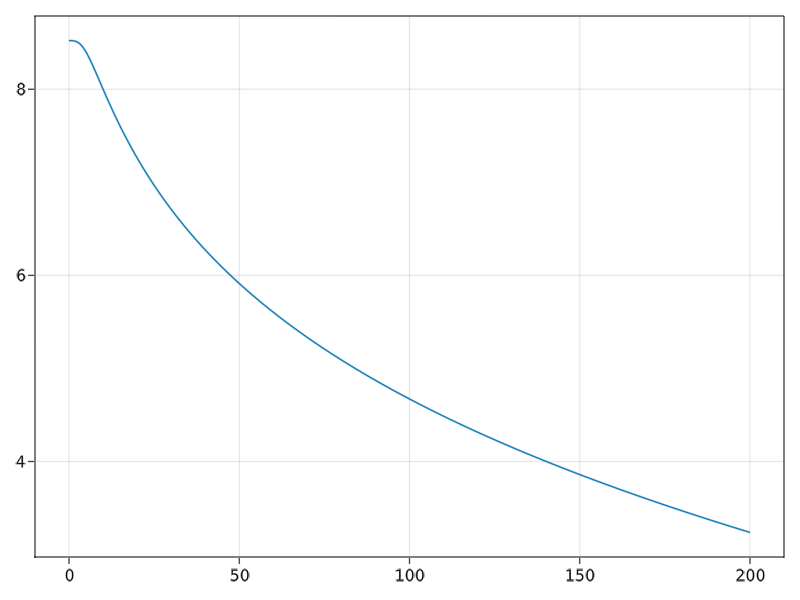

In [47]:
x = range(0., L, length=1000)
lines(x, evaluate(w1,Gridap.Point.(x)), label= "u")


In [48]:
w2, = solve!(w022,solver,oppsi2)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     4.731192e+00              NaN
     1     2.052055e+00     8.718594e+00
     2     8.961285e-01     1.155685e+01
     3     3.878570e-01     1.566450e+01
     4     1.656585e-01     2.123598e+01
     5     6.958887e-02     2.794087e+01
     6     2.815309e-02     3.523945e+01
     7     1.053650e-02     4.269837e+01
     8     3.377841e-03     4.395884e+01
     9     5.973246e-04     2.746730e+01
    10     2.044271e-05     6.158191e+00
    11     2.376323e-08     2.191385e-01
    12     2.988276e-12     2.560351e-04
    13     2.901235e-12     3.473064e-10
    14     2.916778e-12     0.000000e+00
    15     2.916778e-12     0.000000e+00
    16     2.916778e-12     0.000000e+00
    17     2.916778e-12     0.000000e+00
    18     2.916778e-12     0.000000e+00
    19     2.916778e-12     0.000000e+00
    20     2.916778e-12     0.000000e+00
    21     2.916778e-12     0.000000e+00
    22     2.91677

(SingleFieldFEFunction(), NLSolversCache())

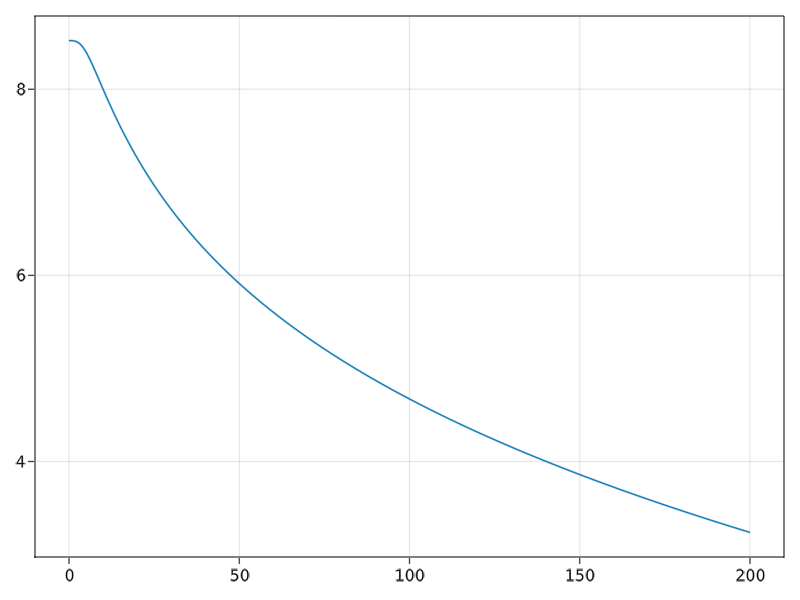

In [49]:
x = range(0., L, length=1000)
lines(x, evaluate(w2,Gridap.Point.(x)), label= "u")

In [50]:
w3, = solve!(w023,solver,oppsi3)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     2.366960e+00              NaN
     1     1.026625e+00     1.232712e+01
     2     4.483110e-01     1.634022e+01
     3     1.940311e-01     2.214847e+01
     4     8.287647e-02     3.002703e+01
     5     3.481519e-02     3.950879e+01
     6     1.408447e-02     4.983050e+01
     7     5.271251e-03     6.037875e+01
     8     1.689847e-03     6.216044e+01
     9     2.988401e-04     3.883948e+01
    10     1.022645e-05     8.707735e+00
    11     1.188819e-08     3.098632e-01
    12     6.775913e-12     3.620354e-04
    13     5.707435e-12     4.923074e-10
    14     6.383782e-12     0.000000e+00
    15     6.383782e-12     0.000000e+00
    16     6.383782e-12     0.000000e+00
    17     6.383782e-12     0.000000e+00
    18     6.383782e-12     0.000000e+00
    19     6.383782e-12     0.000000e+00
    20     6.383782e-12     0.000000e+00
    21     6.383782e-12     0.000000e+00
    22     6.38378

(SingleFieldFEFunction(), NLSolversCache())

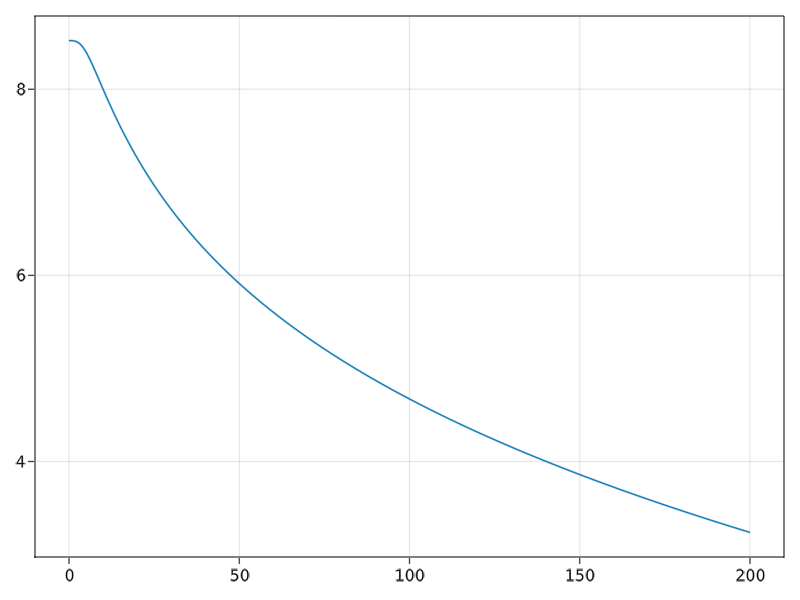

In [51]:
x = range(0., L, length=1000)
lines(x, evaluate(w3,Gridap.Point.(x)), label= "u")

In [52]:
w4, = solve!(w024,solver,oppsi4)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.183814e+00              NaN
     1     5.134589e-01     1.743117e+01
     2     2.242156e-01     2.310599e+01
     3     9.704054e-02     3.131951e+01
     4     4.144977e-02     4.246097e+01
     5     1.741268e-02     5.586992e+01
     6     7.044187e-03     7.046699e+01
     7     2.636367e-03     8.538429e+01
     8     8.451489e-04     8.790337e+01
     9     1.494627e-04     5.492367e+01
    10     5.114422e-06     1.231371e+01
    11     5.942287e-09     4.381806e-01
    12     1.516698e-11     5.119580e-04
    13     1.315792e-11     6.968839e-10
    14     1.479905e-11     0.000000e+00
    15     1.479905e-11     0.000000e+00
    16     1.479905e-11     0.000000e+00
    17     1.479905e-11     0.000000e+00
    18     1.479905e-11     0.000000e+00
    19     1.479905e-11     0.000000e+00
    20     1.479905e-11     0.000000e+00
    21     1.479905e-11     0.000000e+00
    22     1.47990

(SingleFieldFEFunction(), NLSolversCache())

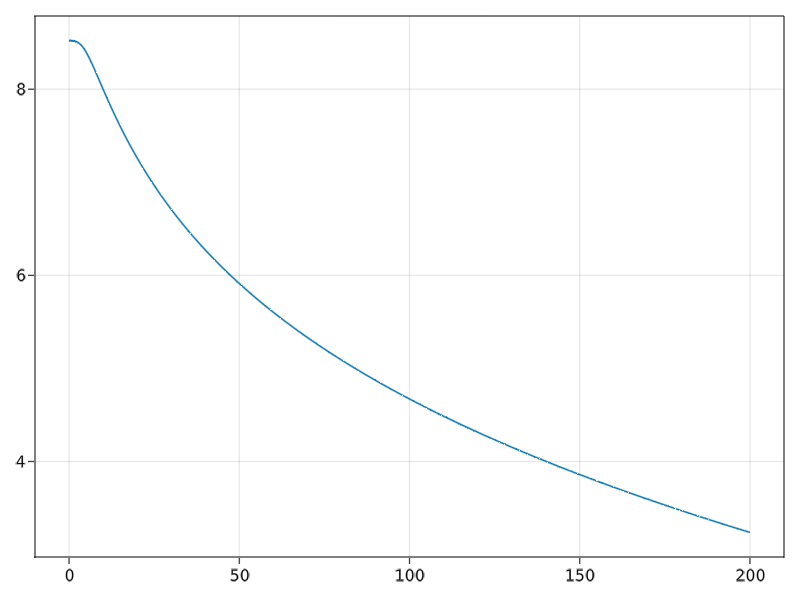

In [53]:
x = range(0., L, length=100000)
lines(x, evaluate(w4,Gridap.Point.(x)), label= "u")

### Comparación soluciones para el factor conforme

In [54]:
w_12 = Interpolable(w1)
w12 = interpolate_everywhere(w_12,U2)

SingleFieldFEFunction():
 num_cells: 1024
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18027149190844755320

In [55]:
dif_cuad_12= (w2-w12)*(w2-w12)

OperationCellField():
 num_cells: 1024
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18027149190844755320

In [56]:
L2norm_dif_cuad_12= sqrt(sum( ∫( dif_cuad_12)*dΩ2 ))

1.2045295405796603e-7

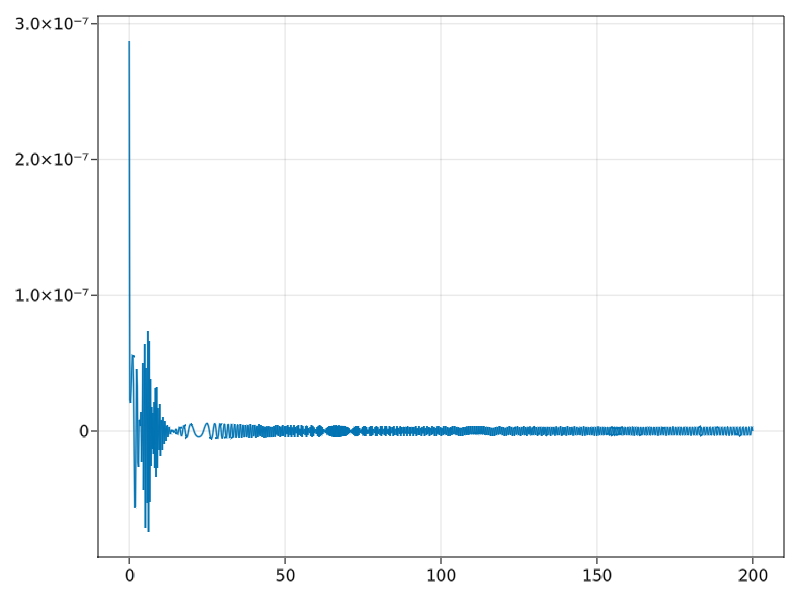

In [57]:
x = range(0., L, length=1000)
lines(x, evaluate(w2-w12,Gridap.Point.(x)), label= "u")

In [58]:
w_23 = Interpolable(w2)
w23 = interpolate_everywhere(w_23,U3)

SingleFieldFEFunction():
 num_cells: 2048
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2380659641351410269

In [59]:
dif_cuad_23= (w3-w23)*(w3-w23)

OperationCellField():
 num_cells: 2048
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2380659641351410269

In [60]:
L2norm_dif_cuad_23= sqrt(sum( ∫( dif_cuad_23)*dΩ3 ))

1.4906607996176827e-8

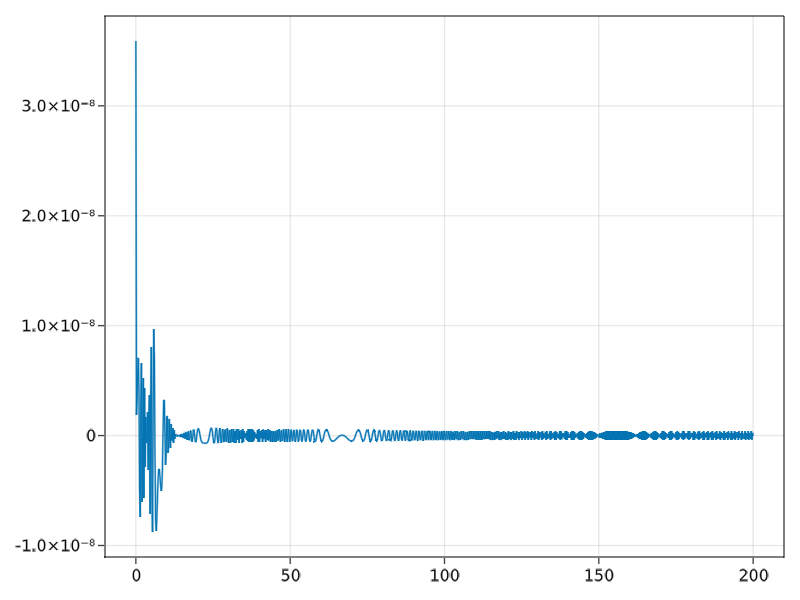

In [61]:
x = range(0., L, length=1000)
lines(x, evaluate(w3-w23,Gridap.Point.(x)), label= "u")

In [62]:
w_34 = Interpolable(w3)
w34 = interpolate_everywhere(w_34,U4)

SingleFieldFEFunction():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

In [63]:
dif_cuad_34= (w4-w34)*(w4-w34)

OperationCellField():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

In [64]:
L2norm_dif_cuad_34= sqrt(sum( ∫( dif_cuad_34)*dΩ4 ))

1.853934868321894e-9

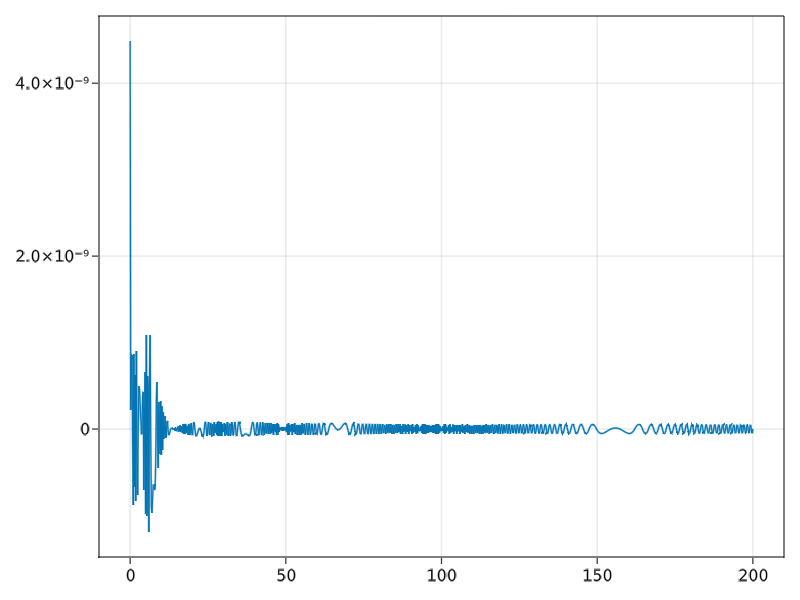

In [65]:
x = range(0., L, length=1000)
lines(x, evaluate(w4-w34,Gridap.Point.(x)), label= "u")

In [66]:
invrho(x)=1. /x[1]
partialψ1=ρvec ⋅ ∇(w1)
partialψ2=ρvec ⋅ ∇(w2)
partialψ3=ρvec ⋅ ∇(w3)
partialψ4=ρvec ⋅ ∇(w4)

OperationCellField():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

### Estudio de residuales del factor conforme

In [67]:
eq_cuad_1= (Δ(w1)+invrho*partialψ1 + t1 *(ρ/ (w1*w1*w1))+F1 *ρ*ρ/(w1*w1*w1*w1*w1*w1*w1))*(Δ(w1)+invrho*partialψ1 + t1 *(ρ/ (w1*w1*w1))+F1 *ρ*ρ/(w1*w1*w1*w1*w1*w1*w1))

OperationCellField():
 num_cells: 512
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 9657873799531331852

In [68]:
L2norm_eq_quad1= sqrt(sum( ∫(eq_cuad_1 )*dΩ1 ))

0.000443037606946612

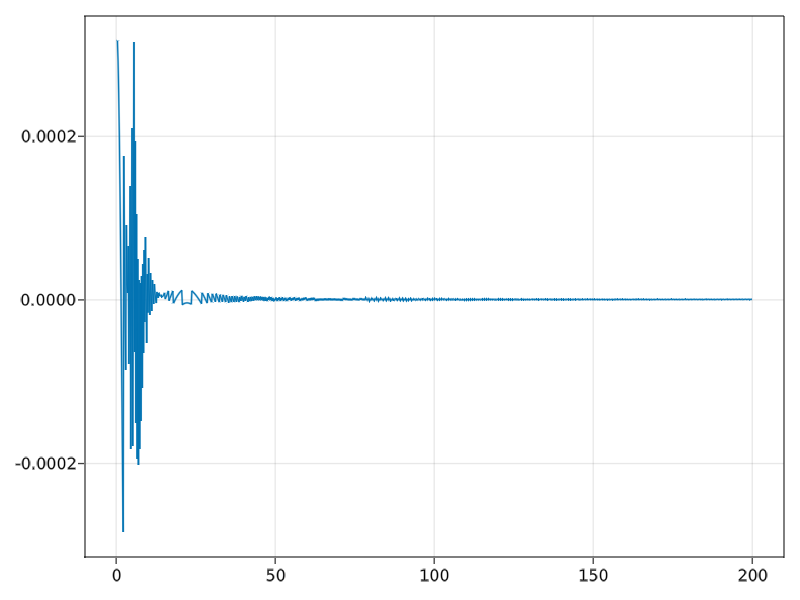

In [69]:
x = range(0., L, length=1000)
lines(x, evaluate(Δ(w1)+invrho*partialψ1 + t1 *(ρ/ (w1*w1*w1))+F1 *ρ*ρ/(w1*w1*w1*w1*w1*w1*w1),Gridap.Point.(x)), label= "u")

In [70]:
eq_cuad_2=(Δ(w2)+invrho*partialψ2 +t1 *(ρ/ (w2*w2*w2))+F2 *ρ*ρ/(w2*w2*w2*w2*w2*w2*w2))*(Δ(w2)+invrho*partialψ2 +t1 *(ρ/ (w2*w2*w2))+F2 *ρ*ρ/(w2*w2*w2*w2*w2*w2*w2))

OperationCellField():
 num_cells: 1024
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18027149190844755320

In [71]:
L2norm_eq_quad2= sqrt(sum( ∫(eq_cuad_2 )*dΩ2 ))

0.0002238326503372308

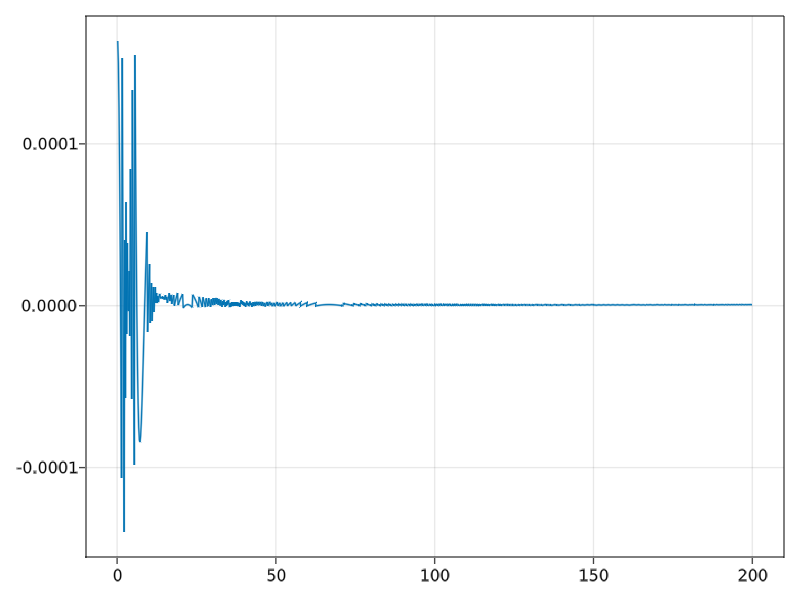

In [72]:
x = range(0., L, length=1000)
lines(x, evaluate(Δ(w2)+invrho*partialψ2 +t1 *(ρ/ (w2*w2*w2))+F2 *ρ*ρ/(w2*w2*w2*w2*w2*w2*w2),Gridap.Point.(x)), label= "u")

In [73]:
eq_cuad_3=(Δ(w3)+invrho*partialψ3 + t1 *(ρ/ (w3*w3*w3))+F3 *ρ*ρ/(w3*w3*w3*w3*w3*w3*w3))*(Δ(w3)+invrho*partialψ3 + t1 *(ρ/ (w3*w3*w3))+F3 *ρ*ρ/(w3*w3*w3*w3*w3*w3*w3))

OperationCellField():
 num_cells: 2048
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2380659641351410269

In [74]:
L2norm_eq_quad3= sqrt(sum( ∫(eq_cuad_3 )*dΩ3 ))

0.00011443131810826474

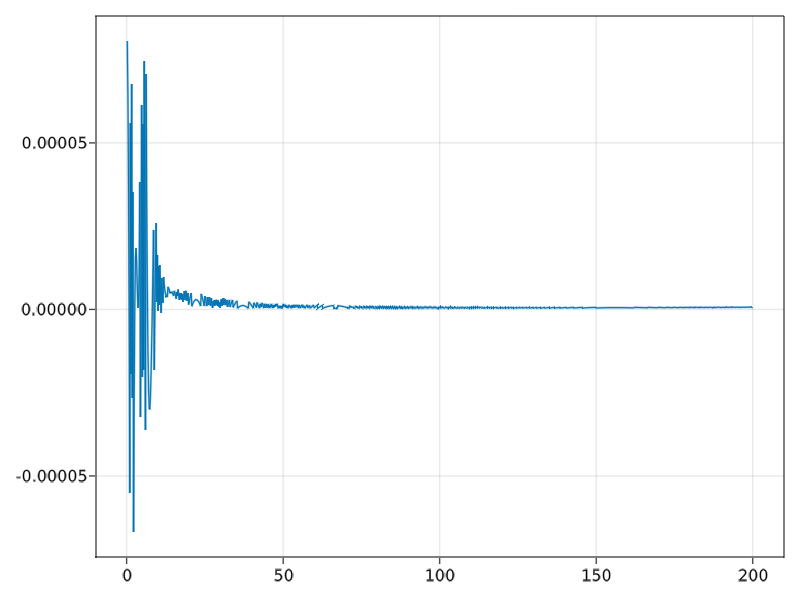

In [75]:
x = range(0., L, length=1000)
lines(x, evaluate(Δ(w3)+invrho*partialψ3 + t1 *(ρ/ (w3*w3*w3))+F3 *ρ*ρ/(w3*w3*w3*w3*w3*w3*w3),Gridap.Point.(x)), label= "u")

In [76]:
eq_cuad_4=(Δ(w4)+invrho*partialψ4 + t1 *(ρ/ (w4*w4*w4))+F4 *ρ*ρ/(w4*w4*w4*w4*w4*w4*w4))*(Δ(w4)+invrho*partialψ4 + t1 *(ρ/ (w4*w4*w4))+F4 *ρ*ρ/(w4*w4*w4*w4*w4*w4*w4))

OperationCellField():
 num_cells: 4096
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 2489176266395879385

In [77]:
L2norm_eq_quad4= sqrt(sum( ∫(eq_cuad_4 )*dΩ4 ))

6.152650378782598e-5

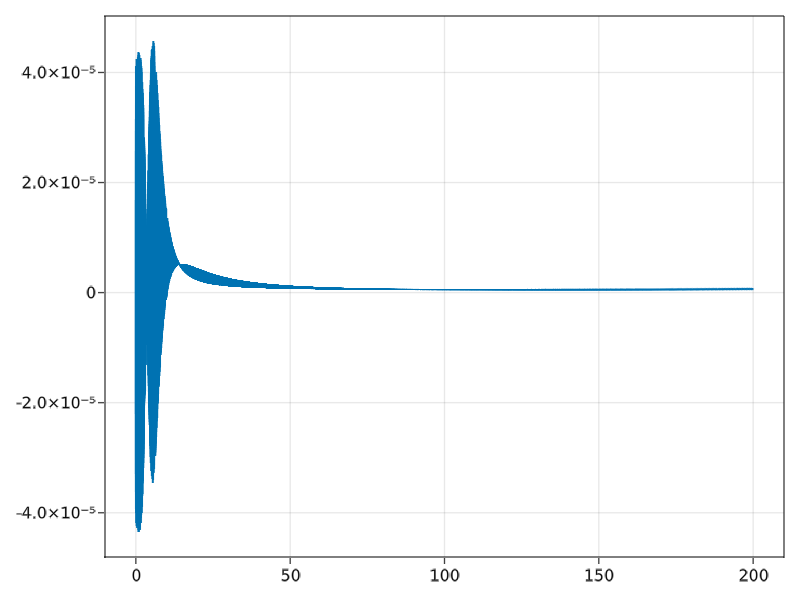

In [78]:
x = range(0., L, length=100000)
lines(x, evaluate(Δ(w4)+invrho*partialψ4 + t1 *(ρ/ (w4*w4*w4))+F4 *ρ*ρ/(w4*w4*w4*w4*w4*w4*w4),Gridap.Point.(x)), label= "u")

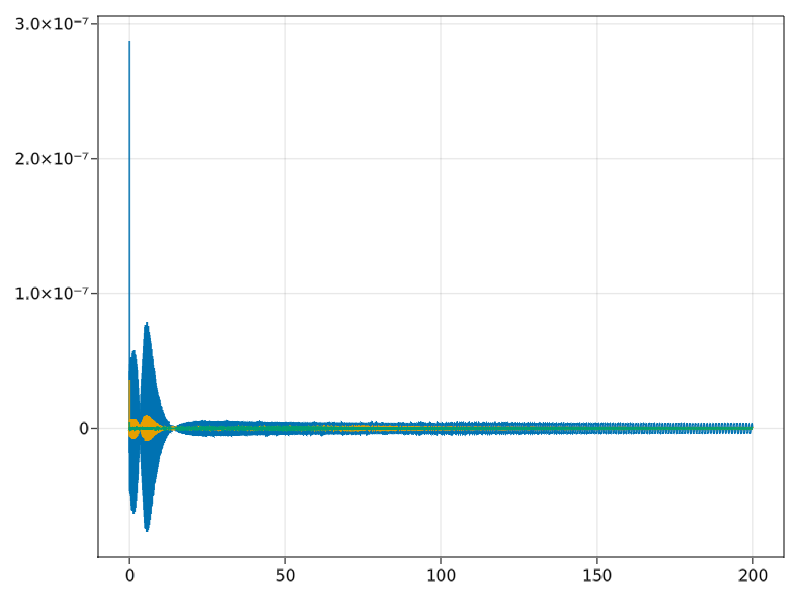

In [79]:
f = Figure()
Axis(f[1, 1])

x = range(0., L, length=10000)

lines!(x, evaluate( w2-w12,Gridap.Point.(x)), label= "u") #AZUL
lines!(x, evaluate(w3-w23,Gridap.Point.(x)) ) # AMARILLO
lines!(x, evaluate(w4-w34,Gridap.Point.(x)) ) #VERDE

f